In [ ]:
import torch

import torch.nn as nn
import pandas as pd

In [ ]:

patient = pd.read_excel('/content/Patient  details.xlsx', sheet_name = 2,header=1)
patient.isnull().sum()

,0
ID (Tumor samples),0
ID (Paired non-tumor samples),0
Age,0
Gender,0
Preoperative AFP (ng/mL),0
DCP (PIVKA-II) (μg/L),62
HBV_DNA (copies/mL),0
"HBsAg (1, positive; 0, negative)",10
"HBsAb (1, positive; 0, negative)",10
"HBeAg (1, positive; 0, negative)",10


In [ ]:
patient.shape

(160, 33)

In [ ]:
patient1 = patient[['ID (Tumor samples)','Liver cirrhosis degree']]

In [ ]:
patient1


,ID (Tumor samples),Liver cirrhosis degree
0,1160T,medium
1,1175T,low
2,1185T,low
3,1186T,medium
4,1188T,medium/high
...,...,...
155,1144T,low
156,1592T,low
157,1655T,low
158,1351T,low


In [ ]:
for i in patient1['Liver cirrhosis degree'].unique():
  print(i, (patient1['Liver cirrhosis degree']==i).sum())
mapping = {'medium/high':'high','medium':'high','high':'high','low':'low','low/medium':'low','No':'low'}


medium 38
low 93
medium/high 2
high 7
low/medium 3
No 17


In [ ]:
patient1

,ID (Tumor samples),Liver cirrhosis degree
0,1160T,medium
1,1175T,low
2,1185T,low
3,1186T,medium
4,1188T,medium/high
...,...,...
155,1144T,low
156,1592T,low
157,1655T,low
158,1351T,low


In [ ]:
j = []
for i in patient1['Liver cirrhosis degree']:
  j.append(mapping[i])

In [ ]:
jannat = patient1

In [ ]:
len(j)


160

In [ ]:
pat2= pd.DataFrame(data = jannat)

In [ ]:
type(pat2)

pandas.core.frame.DataFrame

In [ ]:
pat2['y'] = j

In [ ]:
pat2

,ID (Tumor samples),Liver cirrhosis degree,y
0,1160T,medium,high
1,1175T,low,low
2,1185T,low,low
3,1186T,medium,high
4,1188T,medium/high,high
...,...,...,...
155,1144T,low,low
156,1592T,low,low
157,1655T,low,low
158,1351T,low,low


In [ ]:
high_cirrhossis = pat2[pat2['y']=='high']    #(jpat2[pat2['y']=='high'])
high_cirrhossis

,ID (Tumor samples),Liver cirrhosis degree,y
0,1160T,medium,high
3,1186T,medium,high
4,1188T,medium/high,high
6,1205T,high,high
13,1230T,medium,high
16,1263T,medium,high
19,1283T,high,high
20,1284T,medium,high
23,1321T,medium,high
31,1388T,medium,high


In [ ]:
high_cirrhossis= pat2[pat2['y']=='high']
low_cirrhossis = pat2[pat2['y']=='low']

In [ ]:
low_cirrhossis

,ID (Tumor samples),Liver cirrhosis degree,y
1,1175T,low,low
2,1185T,low,low
5,1191T,low,low
7,1215T,low,low
8,1217T,low,low
...,...,...,...
155,1144T,low,low
156,1592T,low,low
157,1655T,low,low
158,1351T,low,low


In [ ]:
import zipfile
import pandas as pd

with zipfile.ZipFile("/content/Proteins.zip") as z:
    with z.open("Proteins.xlsx") as f:  # file inside zip
        jd = pd.read_excel(f, header=1, sheet_name=1)

In [ ]:
jd

,Uniprot ID,Gene symbol,Patient ID\nDescriptions,1160T,1175T,1185T,1186T,1188T,1191T,1205T,...,2313N,2353N,2362N,2436N,2451N,2452N,2453N,2458N,2467N,2511N
0,A0A075B6H9,IGLV4-69,Immunoglobulin lambda variable 4-69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A0A075B6I0,IGLV8-61,Immunoglobulin lambda variable 8-61,NaN,156507.5781,109651.4297,NaN,64209.082030,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,55397.36328,NaN,NaN,NaN,NaN
2,A0A075B6I9,IGLV7-46,Immunoglobulin lambda variable 7-46,NaN,NaN,NaN,NaN,2542.978271,NaN,NaN,...,NaN,85638.70313,NaN,NaN,NaN,NaN,NaN,149122.2500,NaN,NaN
3,A0A075B6J9,IGLV2-18,Immunoglobulin lambda variable 2-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A0A075B6K4,IGLV3-10,Immunoglobulin lambda variable 3-10,NaN,NaN,NaN,NaN,39431.566410,48222.25781,35923.66016,...,37083.34375,77580.38281,49750.32031,37797.12891,11996.83789,99551.91406,59160.5625,75515.4375,27123.49023,36947.96094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,Q9Y6X5,ENPP4,Bis(5'-adenosyl)-triphosphatase ENPP4,4818.397,NaN,NaN,NaN,7871.615000,NaN,3782.84500,...,3327.86500,NaN,1878.21500,NaN,1429.91600,NaN,NaN,NaN,NaN,NaN
6508,Q9Y6X8,ZHX2,Zinc fingers and homeoboxes protein 2,NaN,44585.3900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6509,Q9Y6X9,MORC2,ATPase MORC2,NaN,NaN,NaN,14440.54,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6510,Q9Y6Y0,IVNS1ABP,Influenza virus NS1A-binding protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
kgf = jd.describe()
kgf

,1160T,1175T,1185T,1186T,1188T,1191T,1205T,1215T,1217T,1219T,...,2313N,2353N,2362N,2436N,2451N,2452N,2453N,2458N,2467N,2511N
count,4.620000e+03,3.591000e+03,3.715000e+03,4.626000e+03,4.981000e+03,4.343000e+03,4.407000e+03,4.161000e+03,5.096000e+03,5.044000e+03,...,4.273000e+03,3.752000e+03,4.641000e+03,4.033000e+03,4.539000e+03,4.510000e+03,4.538000e+03,4.000000e+03,4.197000e+03,4.180000e+03
mean,2.120579e+05,4.927167e+05,3.468356e+05,2.588528e+05,1.671427e+05,2.223018e+05,1.738544e+05,3.807316e+05,1.350387e+05,1.329868e+05,...,2.073322e+05,3.385369e+05,1.755478e+05,2.727270e+05,1.787279e+05,2.142485e+05,2.091011e+05,2.671146e+05,2.478951e+05,2.126607e+05
std,1.429467e+06,2.225321e+06,1.373534e+06,2.242497e+06,8.557597e+05,2.023533e+06,6.153656e+05,5.942211e+06,7.269553e+05,5.511385e+05,...,9.343409e+05,2.812933e+06,8.987644e+05,1.703432e+06,9.421021e+05,1.419650e+06,1.261552e+06,1.452745e+06,1.197890e+06,7.984657e+05
min,1.068359e+00,1.218676e+03,7.785112e+02,3.725934e+02,1.765177e+02,6.440541e+01,4.049243e+02,1.938511e+02,7.941074e+01,8.878505e+01,...,1.866290e+02,5.420807e+02,1.990219e+02,2.401962e+02,1.968629e+02,3.980520e+02,2.799380e+02,6.800671e+02,6.480313e+02,1.756980e+02
25%,2.017196e+04,4.178406e+04,3.107935e+04,2.298933e+04,1.603650e+04,1.509007e+04,1.954661e+04,1.793922e+04,1.806433e+04,1.543051e+04,...,1.673626e+04,2.252412e+04,1.557636e+04,1.837867e+04,1.499448e+04,1.814214e+04,1.638411e+04,2.227458e+04,1.892265e+04,1.835811e+04
50%,4.989720e+04,1.074485e+05,7.790609e+04,5.603219e+04,4.108980e+04,3.876706e+04,4.828846e+04,4.417520e+04,3.907749e+04,3.656095e+04,...,4.115187e+04,5.797546e+04,3.879191e+04,4.826090e+04,3.654302e+04,4.598569e+04,4.051894e+04,5.458632e+04,4.753320e+04,4.594051e+04
75%,1.322063e+05,2.983234e+05,2.161959e+05,1.484996e+05,1.060646e+05,1.093046e+05,1.215042e+05,1.241755e+05,8.997464e+04,9.374165e+04,...,1.212406e+05,1.658787e+05,1.089948e+05,1.415339e+05,1.052529e+05,1.220257e+05,1.193786e+05,1.528967e+05,1.415606e+05,1.384547e+05
max,6.356478e+07,5.599311e+07,3.600800e+07,8.175415e+07,2.430258e+07,1.000348e+08,1.643353e+07,3.001715e+08,2.679595e+07,1.998495e+07,...,3.193294e+07,1.385882e+08,3.441901e+07,6.798173e+07,3.845998e+07,6.584993e+07,5.215037e+07,6.207259e+07,4.407899e+07,1.836318e+07


In [ ]:
import matplotlib.pyplot as plt

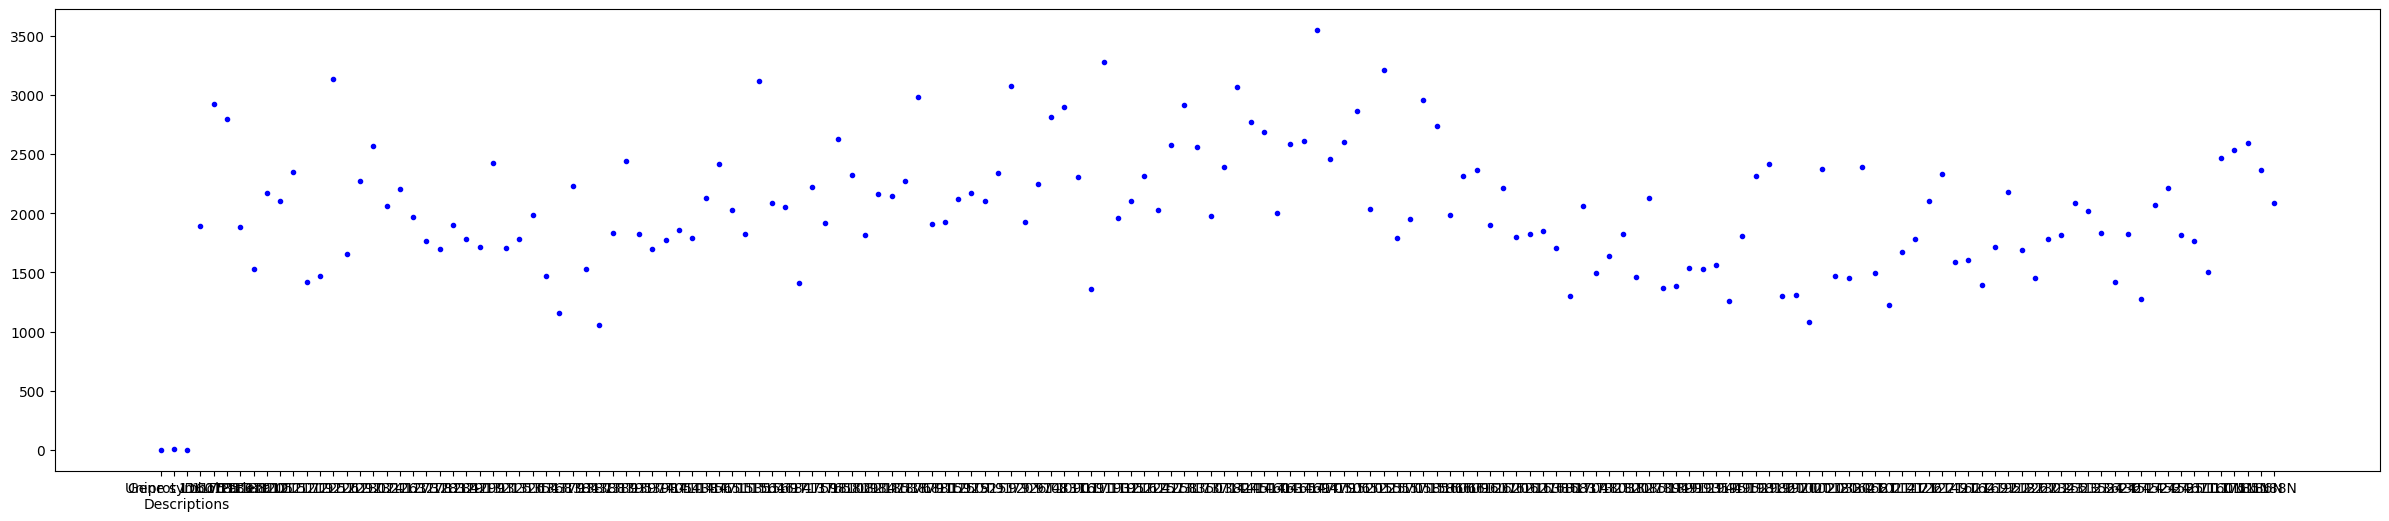

In [ ]:
q = jd.isnull().sum()[:160]
plt.figure(figsize = (30,6))
plt.plot(q,'b.')
plt.xticks(x=  jd.columns)
plt.show()

In [ ]:
q.mean()

np.float64(2004.3375)

In [ ]:
q

,0
Uniprot ID,0
Gene symbol,7
Patient ID\nDescriptions,0
1160T,1892
1175T,2921
...,...
1160N,2470
1175N,2535
1185N,2595
1186N,2369


In [ ]:
a = []
s = []
for i in low_cirrhossis['ID (Tumor samples)']:
  if i in jd.columns:
    a.append(i)
for i in high_cirrhossis['ID (Tumor samples)']:
  if i in jd.columns:
    s.append(i)
len(s)
myprotein = jd['Gene symbol']


In [ ]:
gy = jd[a]


gg = jd[s]

gy.insert(0,'anirudh', myprotein)
gg.insert(0,'anirudh',myprotein)

In [ ]:
low_df = gy
more_df = gg
more_df

,anirudh,1160T,1186T,1188T,1205T,1230T,1263T,1283T,1284T,1321T,...,2002T,2018T,2126T,2127T,2164T,2195T,2452T,2453T,2467T,2511T
0,IGLV4-69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IGLV8-61,NaN,NaN,64209.082030,NaN,NaN,NaN,NaN,NaN,NaN,...,48887.60938,NaN,63617.15625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IGLV7-46,NaN,NaN,2542.978271,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,52103.31641,NaN,56442.46875,NaN,205700.15630,NaN,NaN,NaN
3,IGLV2-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,112879.82810,NaN,NaN,NaN,NaN,NaN
4,IGLV3-10,NaN,NaN,39431.566410,35923.66016,43687.48047,13622.33789,NaN,NaN,NaN,...,51771.30859,34268.89063,70693.21094,10303.05664,130808.72660,52091.42969,41286.71875,90407.58594,20661.90625,28283.87891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,ENPP4,4818.397,NaN,7871.615000,3782.84500,NaN,NaN,2529.902,3027.379,NaN,...,NaN,27218.72000,4176.53800,1520.81300,4385.35000,4300.68500,NaN,NaN,1332.92000,1565.20800
6508,ZHX2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6509,MORC2,NaN,14440.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6510,IVNS1ABP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16553.54000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
high_t = more_df.T
high_t


,0,1,2,3,4,5,6,7,8,9,...,6502,6503,6504,6505,6506,6507,6508,6509,6510,6511
anirudh,IGLV4-69,IGLV8-61,IGLV7-46,IGLV2-18,IGLV3-10,IGLV3-9,IGKV2-28,IGHV4-4,IGKV2D-24,CYP2D7,...,DDX49,CAPN7,WASF2,PIAS3,FAM169A,ENPP4,ZHX2,MORC2,IVNS1ABP,SEC23IP
1160T,NaN,NaN,NaN,NaN,NaN,3344.872803,105767.5234,9857.767578,35177.25,NaN,...,5296.881,11058.79,46951.62,NaN,116312.4,4818.397,NaN,NaN,NaN,52279.43
1186T,NaN,NaN,NaN,NaN,NaN,26985.97656,245245.8906,10257.39941,43374.66016,NaN,...,3405.451,NaN,89502.41,NaN,108996.0,NaN,NaN,14440.54,NaN,39919.5
1188T,NaN,64209.08203,2542.978271,NaN,39431.56641,11131.40527,131715.5,16965.10938,81647.29688,5131.12793,...,8262.563,17481.71,34966.57,151702.0,34682.77,7871.615,NaN,NaN,NaN,25660.26
1205T,NaN,NaN,NaN,NaN,35923.66016,11501.31738,92688.66406,11135.93066,2903.938721,NaN,...,5709.105,8862.799,NaN,26962.01,78530.16,3782.845,NaN,NaN,NaN,22340.11
1230T,NaN,NaN,NaN,NaN,43687.48047,13270.64551,114543.1875,NaN,NaN,NaN,...,NaN,NaN,9543.67,253742.7,80391.68,NaN,NaN,NaN,NaN,40185.95
1263T,NaN,NaN,NaN,NaN,13622.33789,44533.63281,138375.1719,4290.860352,NaN,NaN,...,3789.677,65770.85,18405.01,NaN,47200.43,NaN,NaN,NaN,NaN,19998.71
1283T,NaN,NaN,NaN,NaN,NaN,1974.433228,74810.35938,NaN,NaN,NaN,...,5591.343,NaN,14018.76,NaN,26995.66,2529.902,NaN,NaN,NaN,26605.79
1284T,NaN,NaN,NaN,NaN,NaN,10621.92676,62143.84766,16106.28223,17032.48828,NaN,...,4680.074,11481.67,10573.27,NaN,61389.46,3027.379,NaN,NaN,NaN,22741.52
1321T,NaN,NaN,NaN,NaN,NaN,10165.24512,95905.75,8323.730469,NaN,NaN,...,9050.492,36131.51,5980.36,NaN,10086.03,NaN,NaN,NaN,NaN,38953.18


In [ ]:
low_t= low_df.T
low_t

,0,1,2,3,4,5,6,7,8,9,...,6502,6503,6504,6505,6506,6507,6508,6509,6510,6511
anirudh,IGLV4-69,IGLV8-61,IGLV7-46,IGLV2-18,IGLV3-10,IGLV3-9,IGKV2-28,IGHV4-4,IGKV2D-24,CYP2D7,...,DDX49,CAPN7,WASF2,PIAS3,FAM169A,ENPP4,ZHX2,MORC2,IVNS1ABP,SEC23IP
1175T,NaN,156507.5781,NaN,NaN,NaN,NaN,247690.8438,8987.052734,NaN,NaN,...,NaN,NaN,111351.0,NaN,76320.55,NaN,44585.39,NaN,NaN,30511.96
1185T,NaN,109651.4297,NaN,NaN,NaN,8371.024414,200657.7188,4880.873047,NaN,NaN,...,NaN,NaN,50294.43,NaN,56591.45,NaN,NaN,NaN,NaN,32813.61
1191T,NaN,NaN,NaN,NaN,48222.25781,18575.81836,116856.3281,24757.16016,20878.62109,NaN,...,NaN,4603.769,8185.058,49617.93,147808.4,NaN,NaN,NaN,NaN,22849.61
1215T,NaN,NaN,NaN,NaN,50968.54688,19947.05078,226936.9531,20655.86133,NaN,NaN,...,NaN,13040.01,24837.54,48941.06,54639.26,NaN,NaN,NaN,NaN,2730.203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353T,NaN,80403.26563,146215.625,NaN,150685.6094,30427.99609,479217.4375,19400.21484,NaN,NaN,...,NaN,20684.03,15734.85,81718.2,59951.35,NaN,NaN,NaN,NaN,23932.77
2362T,NaN,NaN,134264.2969,NaN,43043.48828,8728.512695,142494.8594,17443.77734,27112.08398,NaN,...,NaN,14898.83,30998.18,21885.92,39910.7,5027.21,NaN,NaN,NaN,33463.54
2436T,NaN,146454.9844,NaN,NaN,157502.0313,85732.28906,359275.0,31859.25195,82517.19531,NaN,...,9102.523,35856.15,32596.45,114229.2,23199.07,NaN,NaN,4499.794,NaN,37827.57
2451T,NaN,NaN,NaN,NaN,33287.27344,10107.97949,117925.5156,10644.75,NaN,NaN,...,3621.284,18656.12,43153.79,47363.53,41294.53,3717.35,NaN,NaN,36576.97,41905.3


In [ ]:
tx = high_t
tx.columns = tx.iloc[0,:]
tx = tx.drop('anirudh',axis = 0)

In [ ]:
tx

anirudh,IGLV4-69,IGLV8-61,IGLV7-46,IGLV2-18,IGLV3-10,IGLV3-9,IGKV2-28,IGHV4-4,IGKV2D-24,CYP2D7,...,DDX49,CAPN7,WASF2,PIAS3,FAM169A,ENPP4,ZHX2,MORC2,IVNS1ABP,SEC23IP
1160T,NaN,NaN,NaN,NaN,NaN,3344.872803,105767.5234,9857.767578,35177.25,NaN,...,5296.881,11058.79,46951.62,NaN,116312.4,4818.397,NaN,NaN,NaN,52279.43
1186T,NaN,NaN,NaN,NaN,NaN,26985.97656,245245.8906,10257.39941,43374.66016,NaN,...,3405.451,NaN,89502.41,NaN,108996.0,NaN,NaN,14440.54,NaN,39919.5
1188T,NaN,64209.08203,2542.978271,NaN,39431.56641,11131.40527,131715.5,16965.10938,81647.29688,5131.12793,...,8262.563,17481.71,34966.57,151702.0,34682.77,7871.615,NaN,NaN,NaN,25660.26
1205T,NaN,NaN,NaN,NaN,35923.66016,11501.31738,92688.66406,11135.93066,2903.938721,NaN,...,5709.105,8862.799,NaN,26962.01,78530.16,3782.845,NaN,NaN,NaN,22340.11
1230T,NaN,NaN,NaN,NaN,43687.48047,13270.64551,114543.1875,NaN,NaN,NaN,...,NaN,NaN,9543.67,253742.7,80391.68,NaN,NaN,NaN,NaN,40185.95
1263T,NaN,NaN,NaN,NaN,13622.33789,44533.63281,138375.1719,4290.860352,NaN,NaN,...,3789.677,65770.85,18405.01,NaN,47200.43,NaN,NaN,NaN,NaN,19998.71
1283T,NaN,NaN,NaN,NaN,NaN,1974.433228,74810.35938,NaN,NaN,NaN,...,5591.343,NaN,14018.76,NaN,26995.66,2529.902,NaN,NaN,NaN,26605.79
1284T,NaN,NaN,NaN,NaN,NaN,10621.92676,62143.84766,16106.28223,17032.48828,NaN,...,4680.074,11481.67,10573.27,NaN,61389.46,3027.379,NaN,NaN,NaN,22741.52
1321T,NaN,NaN,NaN,NaN,NaN,10165.24512,95905.75,8323.730469,NaN,NaN,...,9050.492,36131.51,5980.36,NaN,10086.03,NaN,NaN,NaN,NaN,38953.18
1388T,NaN,NaN,NaN,NaN,NaN,3285.528564,140574.5938,19101.88672,NaN,NaN,...,26113.34,NaN,21222.38,NaN,50736.09,6232.419,NaN,NaN,NaN,12596.57


In [ ]:
ty = low_t
ty.columns = ty.iloc[0,:]
ty = ty.drop('anirudh',axis = 0)
ty.columns
ty

anirudh,IGLV4-69,IGLV8-61,IGLV7-46,IGLV2-18,IGLV3-10,IGLV3-9,IGKV2-28,IGHV4-4,IGKV2D-24,CYP2D7,...,DDX49,CAPN7,WASF2,PIAS3,FAM169A,ENPP4,ZHX2,MORC2,IVNS1ABP,SEC23IP
1175T,NaN,156507.5781,NaN,NaN,NaN,NaN,247690.8438,8987.052734,NaN,NaN,...,NaN,NaN,111351.0,NaN,76320.55,NaN,44585.39,NaN,NaN,30511.96
1185T,NaN,109651.4297,NaN,NaN,NaN,8371.024414,200657.7188,4880.873047,NaN,NaN,...,NaN,NaN,50294.43,NaN,56591.45,NaN,NaN,NaN,NaN,32813.61
1191T,NaN,NaN,NaN,NaN,48222.25781,18575.81836,116856.3281,24757.16016,20878.62109,NaN,...,NaN,4603.769,8185.058,49617.93,147808.4,NaN,NaN,NaN,NaN,22849.61
1215T,NaN,NaN,NaN,NaN,50968.54688,19947.05078,226936.9531,20655.86133,NaN,NaN,...,NaN,13040.01,24837.54,48941.06,54639.26,NaN,NaN,NaN,NaN,2730.203
1217T,NaN,NaN,NaN,NaN,47204.50781,40956.50391,143852.25,20806.07422,NaN,NaN,...,4804.24,12300.04,28077.67,40266.68,23709.12,5975.796,NaN,NaN,30581.1,27300.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353T,NaN,80403.26563,146215.625,NaN,150685.6094,30427.99609,479217.4375,19400.21484,NaN,NaN,...,NaN,20684.03,15734.85,81718.2,59951.35,NaN,NaN,NaN,NaN,23932.77
2362T,NaN,NaN,134264.2969,NaN,43043.48828,8728.512695,142494.8594,17443.77734,27112.08398,NaN,...,NaN,14898.83,30998.18,21885.92,39910.7,5027.21,NaN,NaN,NaN,33463.54
2436T,NaN,146454.9844,NaN,NaN,157502.0313,85732.28906,359275.0,31859.25195,82517.19531,NaN,...,9102.523,35856.15,32596.45,114229.2,23199.07,NaN,NaN,4499.794,NaN,37827.57
2451T,NaN,NaN,NaN,NaN,33287.27344,10107.97949,117925.5156,10644.75,NaN,NaN,...,3621.284,18656.12,43153.79,47363.53,41294.53,3717.35,NaN,NaN,36576.97,41905.3


In [ ]:
tx

anirudh,IGLV4-69,IGLV8-61,IGLV7-46,IGLV2-18,IGLV3-10,IGLV3-9,IGKV2-28,IGHV4-4,IGKV2D-24,CYP2D7,...,DDX49,CAPN7,WASF2,PIAS3,FAM169A,ENPP4,ZHX2,MORC2,IVNS1ABP,SEC23IP
1160T,NaN,NaN,NaN,NaN,NaN,3344.872803,105767.5234,9857.767578,35177.25,NaN,...,5296.881,11058.79,46951.62,NaN,116312.4,4818.397,NaN,NaN,NaN,52279.43
1186T,NaN,NaN,NaN,NaN,NaN,26985.97656,245245.8906,10257.39941,43374.66016,NaN,...,3405.451,NaN,89502.41,NaN,108996.0,NaN,NaN,14440.54,NaN,39919.5
1188T,NaN,64209.08203,2542.978271,NaN,39431.56641,11131.40527,131715.5,16965.10938,81647.29688,5131.12793,...,8262.563,17481.71,34966.57,151702.0,34682.77,7871.615,NaN,NaN,NaN,25660.26
1205T,NaN,NaN,NaN,NaN,35923.66016,11501.31738,92688.66406,11135.93066,2903.938721,NaN,...,5709.105,8862.799,NaN,26962.01,78530.16,3782.845,NaN,NaN,NaN,22340.11
1230T,NaN,NaN,NaN,NaN,43687.48047,13270.64551,114543.1875,NaN,NaN,NaN,...,NaN,NaN,9543.67,253742.7,80391.68,NaN,NaN,NaN,NaN,40185.95
1263T,NaN,NaN,NaN,NaN,13622.33789,44533.63281,138375.1719,4290.860352,NaN,NaN,...,3789.677,65770.85,18405.01,NaN,47200.43,NaN,NaN,NaN,NaN,19998.71
1283T,NaN,NaN,NaN,NaN,NaN,1974.433228,74810.35938,NaN,NaN,NaN,...,5591.343,NaN,14018.76,NaN,26995.66,2529.902,NaN,NaN,NaN,26605.79
1284T,NaN,NaN,NaN,NaN,NaN,10621.92676,62143.84766,16106.28223,17032.48828,NaN,...,4680.074,11481.67,10573.27,NaN,61389.46,3027.379,NaN,NaN,NaN,22741.52
1321T,NaN,NaN,NaN,NaN,NaN,10165.24512,95905.75,8323.730469,NaN,NaN,...,9050.492,36131.51,5980.36,NaN,10086.03,NaN,NaN,NaN,NaN,38953.18
1388T,NaN,NaN,NaN,NaN,NaN,3285.528564,140574.5938,19101.88672,NaN,NaN,...,26113.34,NaN,21222.38,NaN,50736.09,6232.419,NaN,NaN,NaN,12596.57


In [ ]:
shrubs = abs(((tx.isnull().sum()/47)-1))
plants = abs(((ty.isnull().sum()/105)-1))
dd = (shrubs -plants).sort_values(ascending = False)[:30]
dd


,0
anirudh,
L3HYPDH,0.254509
UBR1,0.254509
TRIM71,0.232219
STEAP3,0.224721
SEPSECS,0.214792
HPN,0.211955
CD5L,0.208105
EDEM3,0.206890
GPAT4,0.204863


In [ ]:
dd

,0
anirudh,
L3HYPDH,0.254509
UBR1,0.254509
TRIM71,0.232219
STEAP3,0.224721
SEPSECS,0.214792
HPN,0.211955
CD5L,0.208105
EDEM3,0.206890
GPAT4,0.204863


In [ ]:
tapsee = plants - shrubs


For a patient the protiens that are present in more number of high cirhossis patients and lower numbers for lower cirhossis patients (num of patients in high vs low cirhossis as criteria) are in descending order
 'DLGAP4',
 'TRIM14',
 'SLC16A3',
 'CREB3L3',
 'ATP6AP1',
 'SULT1C2',
 'EIF1AY',
 'IMPDH1',
 'SNCG',
 'P4HA2',
 'TP53BP1',
 'TRIR',
 'POM121C',
 'PAM16',
 'PPP1R13L',
 'SENP3',
 'CLCN7',
 'SPP1',
 'SMARCA1',
 'ARPIN',
 'SMG9',
 'NOA1',

In [ ]:
low_t= low_df.T


In [ ]:
tx = high_t
tx.columns = tx.iloc[0,:]
tx = tx.drop('anirudh',axis = 0)

In [ ]:
ty = low_t
ty.columns = ty.iloc[0,:]
ty = ty.drop('anirudh',axis = 0)
ty.columns

Index([ 'IGLV4-69',  'IGLV8-61',  'IGLV7-46',  'IGLV2-18',  'IGLV3-10',
         'IGLV3-9',  'IGKV2-28',   'IGHV4-4', 'IGKV2D-24',    'CYP2D7',
       ...
           'DDX49',     'CAPN7',     'WASF2',     'PIAS3',   'FAM169A',
           'ENPP4',      'ZHX2',     'MORC2',  'IVNS1ABP',   'SEC23IP'],
      dtype='object', name='anirudh', length=6512)

In [ ]:
ty.sum()/105
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
sc3 = MinMaxScaler()

In [ ]:
ty = ty.astype(float)

In [ ]:
ty = ty.fillna(0)

In [ ]:
mm = MinMaxScaler()
mm

MinMaxScaler()

In [ ]:
ty.shape, tx.shape




ty.mean()

,0
anirudh,
IGLV4-69,2451.641890
IGLV8-61,22969.493899
IGLV7-46,29045.501594
IGLV2-18,867.216406
IGLV3-10,65657.104930
...,...
ENPP4,3703.815115
ZHX2,5806.148476
MORC2,484.338676


In [ ]:
from scipy import stats

In [ ]:
ty= (ty- ty.min()) / (ty.max() - ty.min())
tx = tx.astype(float)
tx = ((tx - tx.min()))/(tx.max()- tx.min())
tx = tx.fillna(0)

a = tx.std()
b = ty.std()


#For an average patient proteins that are relatively in higher quantity for higher cirhossis as far as average protein quant per patient as criteria are in descending orde 'RAB3GAP2', 'FUBP1', 'SCARB2', 'SORBS3', 'DNPEP', 'XE', 'HDGF','TM9SF2', 'DYNC1H1', 'PSMD2', 'LSS', 'MAPK1', 'SEPTIN6', 'LAMP1' 'SP29', 'TBC1D17', 'RPS10', 'AHSA1', 'VDAC1', 'ADSL', 'DYNLRB1','DCTN1', 'CORO1B', 'SDF2L1', 'NPLOC4'


In [ ]:
#pd.DataFrame(ty.mean(), tx.mean())
nb500 = list(ty.mean())
nb600 = list(tx.mean())
nb501 = list(ty.mean().index)
nb588 = list(ty.std())
nb676 = list(tx.std())

In [ ]:
fb = pd.DataFrame({"high:cmeans": nb500, "low:cmeans":nb600,"protein_list":nb501, "low:cstd":nb588,"high:cstd":nb676})


In [ ]:
high = []
high

[]

In [ ]:
fb

#for i in range(len(monica["protein_list"])):
 # international_love = ((monica['high:cmeans']- monica['low:cmenas']))/()
for i in range(0,len(fb["protein_list"])):
    il = ((fb["high:cmeans"]))
fb['diff_means'] = fb['high:cmeans'] - fb['low:cmeans']


In [ ]:
fb["p-values"] = fb['diff_means']/pow(((fb['low:cstd'] * fb['low:cstd'])/105 ) + ((fb['high:cstd']* fb['high:cstd'])/48) ,0.5)

In [ ]:
fb["degreesoffreedm"]=150

In [ ]:
import numpy as np
from math import log2
aa = list(fb["high:cmeans"])
bb = list(fb["low:cmeans"])
a = [log2(x) for x in aa]

p = [log2(x) if x>0 else 0.01 for x in bb]
p
fb["d"] = a
fb["h"] = p
fb["logfoldchange"] = fb["d"] - fb["h"]
import matplotlib.pyplot as plt
fb['neg_log10_pval'] = -np.log10(fb['p-values'])

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
fb= fb.fillna(0)


In [ ]:
fb

,high:cmeans,low:cmeans,protein_list,low:cstd,high:cstd,diff_means,p-values,degreesoffreedm,d,h,logfoldchange,neg_log10_pval
0,0.011327,0.000000,IGLV4-69,0.099150,0.000000,0.011327,1.170667,150,-6.464038,0.010000,-6.474038,-0.068433
1,0.102095,0.048483,IGLV8-61,0.220933,0.153413,0.053612,1.734683,150,-3.292010,-4.366378,1.074368,-0.239220
2,0.092614,0.051636,IGLV7-46,0.193357,0.167562,0.040978,1.335830,150,-3.432626,-4.275469,0.842843,-0.125751
3,0.015092,0.030696,IGLV2-18,0.112572,0.158233,-0.015604,-0.615706,150,-6.050054,-5.025783,-1.024271,0.000000
4,0.142071,0.124520,IGLV3-10,0.200724,0.199358,0.017550,0.504185,150,-2.815316,-3.005545,0.190229,0.297410
...,...,...,...,...,...,...,...,...,...,...,...,...
6507,0.177463,0.097351,ENPP4,0.232628,0.171838,0.080111,2.382584,150,-2.494411,-3.360654,0.866243,-0.377048
6508,0.042867,0.034702,ZHX2,0.131523,0.170775,0.008165,0.293796,150,-4.543998,-4.848842,0.304844,0.531954
6509,0.048349,0.000000,MORC2,0.168954,0.000000,0.048349,2.932370,150,-4.370355,0.010000,-4.380355,-0.467219
6510,0.067490,0.044075,IVNS1ABP,0.201025,0.180017,0.023416,0.719216,150,-3.889173,-4.503912,0.614739,0.143141


In [ ]:
#fb
"""import matplotlib.pyplot as plt
import numpy as np

# Calculate -log10(p-value)
fb['neg_log10_pval'] = -np.log10(fb['p-values'])

# Plot base volcano
plt.figure(figsize=(10, 6))
plt.scatter(fb['logfoldchange'], fb['neg_log10_pval'], color='grey', alpha=0.7)


fc_thresh = 1
pval_thresh = 0.05

up = fb[(fb['logfoldchange'] > fc_thresh) & (fb['p-values'] < pval_thresh)]
down = fb[(fb['logfoldchange'] < -fc_thresh) & (fb['p-values'] < pval_thresh)]

plt.scatter(up['logfoldchange'], up['neg_log10_pval'], color='red', label='Upregulated')
plt.scatter(down['logfoldchange'], down['neg_log10_pval'], color='blue', label='Downregulated')

# Add threshold lines
plt.axhline(-np.log10(pval_thresh), color='black', linestyle='--')
plt.axvline(fc_thresh, color='black', linestyle='--')
plt.axvline(-fc_thresh, color='black', linestyle='--')

#  Label top N significant proteins
top_proteins = adithya.nsmallest(10,'p-values')
for _, row in top_proteins.iterrows():
    plt.text(row['logfoldchange'], row['neg_log10_pval'], row['protein_list'], fontsize=8)

plt.xlabel('log2(Fold Change)')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot of Proteins')
plt.legend()
plt.tight_layout()
plt.show()"""

"import matplotlib.pyplot as plt\nimport numpy as np\n\n# Calculate -log10(p-value)\nfb['neg_log10_pval'] = -np.log10(fb['p-values'])\n\n# Plot base volcano\nplt.figure(figsize=(10, 6))\nplt.scatter(fb['logfoldchange'], fb['neg_log10_pval'], color='grey', alpha=0.7)\n\n\nfc_thresh = 1\npval_thresh = 0.05\n\nup = fb[(fb['logfoldchange'] > fc_thresh) & (fb['p-values'] < pval_thresh)]\ndown = fb[(fb['logfoldchange'] < -fc_thresh) & (fb['p-values'] < pval_thresh)]\n\nplt.scatter(up['logfoldchange'], up['neg_log10_pval'], color='red', label='Upregulated')\nplt.scatter(down['logfoldchange'], down['neg_log10_pval'], color='blue', label='Downregulated')\n\n# Add threshold lines\nplt.axhline(-np.log10(pval_thresh), color='black', linestyle='--')\nplt.axvline(fc_thresh, color='black', linestyle='--')\nplt.axvline(-fc_thresh, color='black', linestyle='--')\n\n#  Label top N significant proteins\ntop_proteins = adithya.nsmallest(10,'p-values')\nfor _, row in top_proteins.iterrows():\n    plt.text(

In [ ]:
hg = fb[fb['p-values']<0.05]
different_proteins = hg['protein_list']
different_proteins
hg1= hg[hg['diff_means']>0]
hg2 = hg[hg['diff_means']<=0]
dddddd = hg2['protein_list']
dddd = hg1['protein_list']
dddddd

,protein_list
3,IGLV2-18
5,IGLV3-9
7,IGHV4-4
9,CYP2D7
11,IGHV3-49
...,...
6498,SLC4A4
6500,DGKB
6504,WASF2
6506,FAM169A


In [ ]:
hg['protein_list']

,protein_list
3,IGLV2-18
5,IGLV3-9
7,IGHV4-4
9,CYP2D7
11,IGHV3-49
...,...
6498,SLC4A4
6500,DGKB
6504,WASF2
6506,FAM169A


In [ ]:
from scipy import stats
t_stat, p_value = stats.ttest_ind(fb['high:cmeans'], fb['low:cmeans'])
print(p_value)

1.6830624260982627e-47


In [ ]:
fb

,high:cmeans,low:cmeans,protein_list,low:cstd,high:cstd,diff_means,p-values,degreesoffreedm,d,h,logfoldchange,neg_log10_pval
0,0.011327,0.000000,IGLV4-69,0.099150,0.000000,0.011327,1.170667,150,-6.464038,0.010000,-6.474038,-0.068433
1,0.102095,0.048483,IGLV8-61,0.220933,0.153413,0.053612,1.734683,150,-3.292010,-4.366378,1.074368,-0.239220
2,0.092614,0.051636,IGLV7-46,0.193357,0.167562,0.040978,1.335830,150,-3.432626,-4.275469,0.842843,-0.125751
3,0.015092,0.030696,IGLV2-18,0.112572,0.158233,-0.015604,-0.615706,150,-6.050054,-5.025783,-1.024271,0.000000
4,0.142071,0.124520,IGLV3-10,0.200724,0.199358,0.017550,0.504185,150,-2.815316,-3.005545,0.190229,0.297410
...,...,...,...,...,...,...,...,...,...,...,...,...
6507,0.177463,0.097351,ENPP4,0.232628,0.171838,0.080111,2.382584,150,-2.494411,-3.360654,0.866243,-0.377048
6508,0.042867,0.034702,ZHX2,0.131523,0.170775,0.008165,0.293796,150,-4.543998,-4.848842,0.304844,0.531954
6509,0.048349,0.000000,MORC2,0.168954,0.000000,0.048349,2.932370,150,-4.370355,0.010000,-4.380355,-0.467219
6510,0.067490,0.044075,IVNS1ABP,0.201025,0.180017,0.023416,0.719216,150,-3.889173,-4.503912,0.614739,0.143141


In [ ]:
list2 = []

for i in tx.columns:
  t_test, pval = stats.ttest_ind(tx[i], ty[i])
  list2.append(pval)
type(list2[0])

numpy.float64

In [ ]:
katri= []
for i in list2:

  katri.append(np.max(i))

In [ ]:
fb["screwed"] = katri


In [ ]:
#List of proteins that are statistically different in both the groups
an_fav = fb[fb["screwed"]<0.05]
dd = an_fav[["protein_list","screwed"]]
dd[:400]
dd

,protein_list,screwed
10,IGKV3D-11,0.003340
14,IGHV3-73,0.017135
29,CRYAA2,0.000029
32,UBA6,0.015694
33,ESYT2,0.010080
...,...,...
6494,SQOR,0.026612
6495,LAMC3,0.000970
6502,DDX49,0.009069
6506,FAM169A,0.019442


In [ ]:
type(list2[0])

numpy.float64

In [ ]:
fb[['logfoldchange']].sort_values('logfoldchange',ascending = False)[:300]

,logfoldchange
3580,3.889084
2960,3.322594
4913,3.187128
820,3.179985
3168,3.093349
...,...
5698,0.972719
817,0.971951
324,0.964686
5427,0.963807


In [ ]:
#index = [1,2]
#adithya.iloc[index]

In [ ]:
imdy = []

duminy = []

fb["valus"] = list2
list2[72] = 1
for i in fb["valus"]:
  imdy.append(np.mean(i))


In [ ]:
fb["pup"] = imdy
actual_proteins = fb[fb["pup"]<0.049].sort_values(by = "pup", ascending = True)["protein_list"]
actual_proteins9  = actual_proteins[:800]
actual_proteins[:10]

,protein_list
3151,SCARB2
6154,DNPEP
5437,RAB3GAP2
4701,FUBP1
5074,TM9SF2
5605,SDF2L1
478,SORBS3
4496,BRK1
3180,DYNC1H1
807,SP29


In [ ]:
proteinsinlc = fb.sort_values(by = "logfoldchange", ascending = True)["protein_list"][:400]
proteinsinhc = fb.sort_values(by = "logfoldchange", ascending = False)["protein_list"][:400]

In [ ]:
proteinsinhc

,protein_list
3580,EMC4
2960,TBL3
4913,TRIM47
820,BAG3
3168,UBAP2L
...,...
19,IGKV3D-20
5415,ISCU
4141,HSCB
651,SOAT2


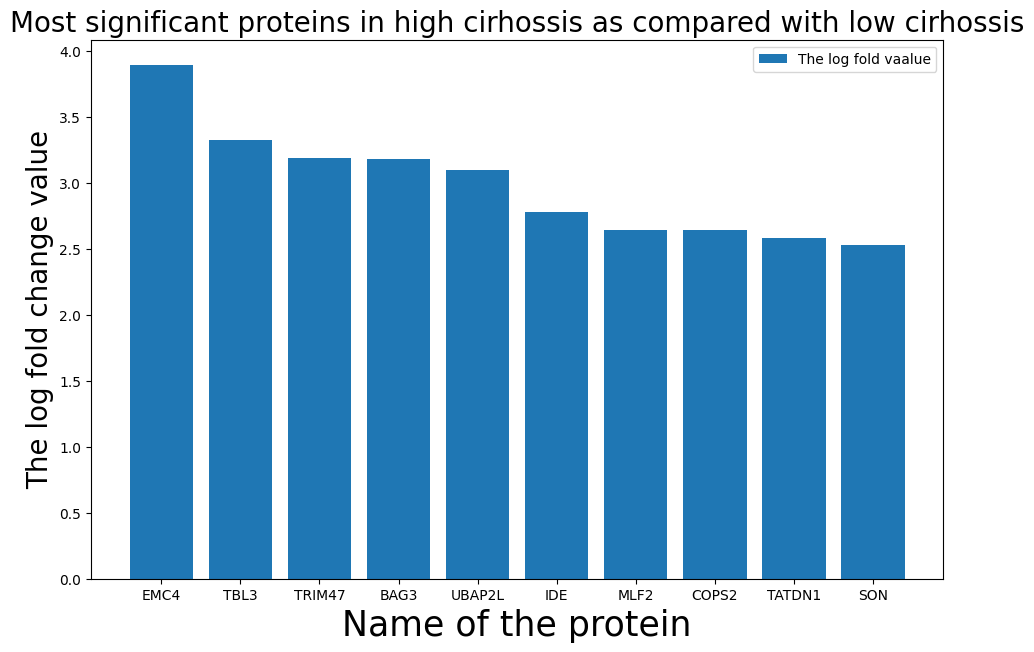

In [ ]:
    #the most signicant proteins in high cirrhossis groups compared to the latter ones
s = fb.sort_values('logfoldchange',ascending=False)['logfoldchange'][:10]
Y= fb.sort_values('logfoldchange', ascending = False)['protein_list'][:10]
plt.figure(figsize = (11,7))
plt.title("Most significant proteins in high cirhossis as compared with low cirhossis", size = 20)
plt.xlabel("Name of the protein", size = 25)
plt.ylabel("The log fold change value", size = 20)
plt.bar(Y,s, width = 0.8,label = "The log fold vaalue" )
plt.legend()
plt.show()


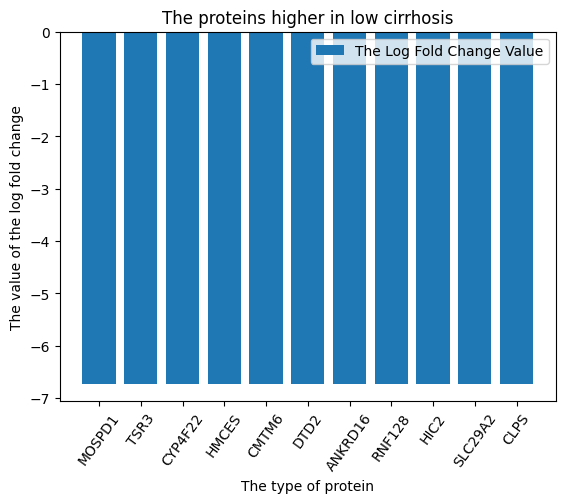

In [ ]:
ia = fb.sort_values(by = "logfoldchange", ascending = True)["logfoldchange"][:11]
ua = fb.sort_values(by = "logfoldchange",ascending = True)["protein_list"][:11]
plt.bar(ua,ia,label = "The Log Fold Change Value")
plt.ylabel("The value of the log fold change")
plt.xlabel("The type of protein")
plt.title("The proteins higher in low cirrhosis")
plt.legend(loc = "best")
plt.xticks(ua, rotation = 54)
plt.show()


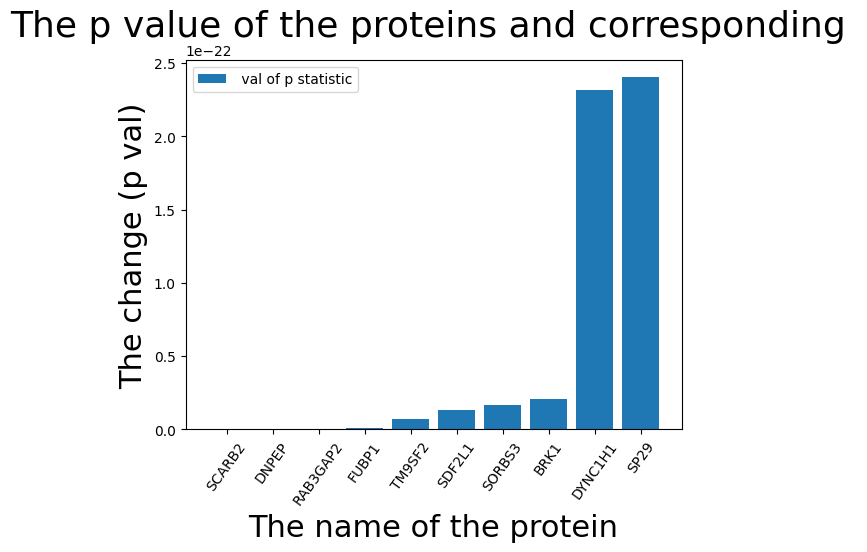

In [ ]:
#Proteins that are most significant interms of difference in low vs high groups
#cirrhosis'
e = fb.sort_values(by = "pup", ascending = True)["pup"][:10]
him = fb.sort_values(by = "pup", ascending = True)["protein_list"][:10]
plt.bar(him, e, label = " val of p statistic")
plt.xticks(him, rotation = 54)
plt.xlabel("The name of the protein", size = 22)
plt.ylabel("The change (p val)", size = 22)
plt.title("The p value of the proteins and corresponding ", size = 26)
plt.legend(loc = "best")
plt.show()

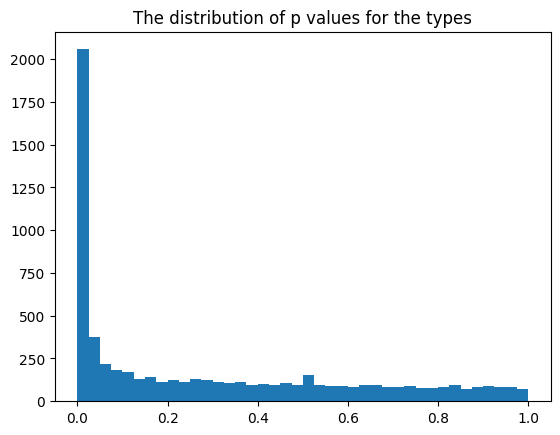

In [ ]:
plt.hist(fb["screwed"], bins = 40, label = "The p value ranges for group of proteins")
plt.title("The distribution of p values for the types")
plt.show()

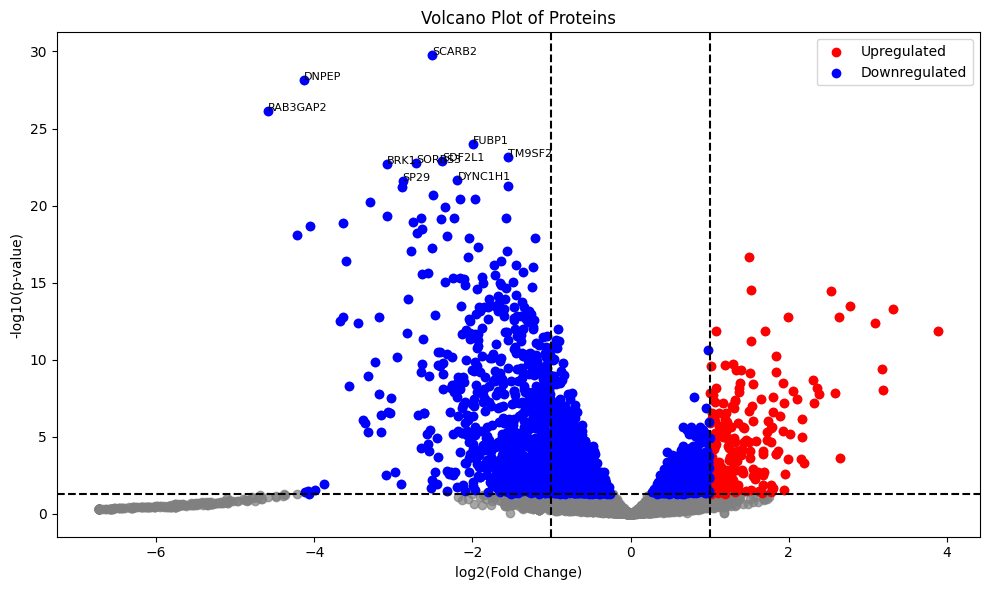

In [ ]:
fb
import matplotlib.pyplot as plt
import numpy as np

# Calculate -log10(p-value)
fb['neg_log10_pval'] = -np.log10(fb['screwed'])

# Plot base volcano
plt.figure(figsize=(10, 6))
plt.scatter(fb['logfoldchange'], fb['neg_log10_pval'], color='grey', alpha=0.7)


fc_thresh = 1
pval_thresh = 0.05

up = fb[(fb['logfoldchange'] > fc_thresh) & (fb['screwed'] < pval_thresh)]
down = fb[(fb['logfoldchange'] < fc_thresh) & (fb['screwed'] < pval_thresh)]

plt.scatter(up['logfoldchange'], up['neg_log10_pval'], color='red', label='Upregulated')
plt.scatter(down['logfoldchange'], down['neg_log10_pval'], color='blue', label='Downregulated')

# Add threshold lines
plt.axhline(-np.log10(pval_thresh), color='black', linestyle='--')
plt.axvline(fc_thresh, color='black', linestyle='--')
plt.axvline(-fc_thresh, color='black', linestyle='--')

#  Label top N significant proteins
top_proteins = fb.nsmallest(10,'screwed')
for _, row in top_proteins.iterrows():
    plt.text(row['logfoldchange'], row['neg_log10_pval'], row['protein_list'], fontsize=8)

plt.xlabel('log2(Fold Change)')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot of Proteins')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
fb['pup'].max()
yu = []

In [ ]:
try:
  for a in range(0, len(fb['valus'])):
    u =  fb["valus"][a] + 1
    yu.append(u)
except:
  print(a)
len(yu)
ab = []



In [ ]:
for i in yu:
  ab.append((type(i)))
ab

[numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.f

In [ ]:
ab = pd.Series(ab)


In [ ]:
i = ab[0]
index01 = ab[ab!=i].index
index01

Index([  72,  107,  845,  849,  886, 1283, 1284, 1285, 1286, 1287, 1345, 1356,
       1858, 1904, 2079, 2080, 2100, 2656, 3887, 4212, 4279, 5371, 5557, 5647,
       5668, 6092, 6167],
      dtype='int64')

In [ ]:
inn = fb.iloc[index01]

In [ ]:
com = fb.drop(labels = index01)

In [ ]:
com

,high:cmeans,low:cmeans,protein_list,low:cstd,high:cstd,diff_means,p-values,degreesoffreedm,d,h,logfoldchange,neg_log10_pval,screwed,valus,pup
0,0.011327,0.000000,IGLV4-69,0.099150,0.000000,0.011327,1.170667,150,-6.464038,0.010000,-6.474038,0.360941,0.435571,0.435571,0.435571
1,0.102095,0.048483,IGLV8-61,0.220933,0.153413,0.053612,1.734683,150,-3.292010,-4.366378,1.074368,0.873647,0.133768,0.133768,0.133768
2,0.092614,0.051636,IGLV7-46,0.193357,0.167562,0.040978,1.335830,150,-3.432626,-4.275469,0.842843,0.675941,0.210892,0.210892,0.210892
3,0.015092,0.030696,IGLV2-18,0.112572,0.158233,-0.015604,-0.615706,150,-6.050054,-5.025783,-1.024271,0.310317,0.489421,0.489421,0.489421
4,0.142071,0.124520,IGLV3-10,0.200724,0.199358,0.017550,0.504185,150,-2.815316,-3.005545,0.190229,0.208775,0.618336,0.618336,0.618336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,0.177463,0.097351,ENPP4,0.232628,0.171838,0.080111,2.382584,150,-2.494411,-3.360654,0.866243,1.442839,0.036071,0.036071,0.036071
6508,0.042867,0.034702,ZHX2,0.131523,0.170775,0.008165,0.293796,150,-4.543998,-4.848842,0.304844,0.125946,0.748262,0.748262,0.748262
6509,0.048349,0.000000,MORC2,0.168954,0.000000,0.048349,2.932370,150,-4.370355,0.010000,-4.380355,1.283560,0.052052,0.052052,0.052052
6510,0.067490,0.044075,IVNS1ABP,0.201025,0.180017,0.023416,0.719216,150,-3.889173,-4.503912,0.614739,0.305835,0.494499,0.494499,0.494499


In [ ]:
com

,high:cmeans,low:cmeans,protein_list,low:cstd,high:cstd,diff_means,p-values,degreesoffreedm,d,h,logfoldchange,neg_log10_pval,screwed,valus,pup
0,0.011327,0.000000,IGLV4-69,0.099150,0.000000,0.011327,1.170667,150,-6.464038,0.010000,-6.474038,0.360941,0.435571,0.435571,0.435571
1,0.102095,0.048483,IGLV8-61,0.220933,0.153413,0.053612,1.734683,150,-3.292010,-4.366378,1.074368,0.873647,0.133768,0.133768,0.133768
2,0.092614,0.051636,IGLV7-46,0.193357,0.167562,0.040978,1.335830,150,-3.432626,-4.275469,0.842843,0.675941,0.210892,0.210892,0.210892
3,0.015092,0.030696,IGLV2-18,0.112572,0.158233,-0.015604,-0.615706,150,-6.050054,-5.025783,-1.024271,0.310317,0.489421,0.489421,0.489421
4,0.142071,0.124520,IGLV3-10,0.200724,0.199358,0.017550,0.504185,150,-2.815316,-3.005545,0.190229,0.208775,0.618336,0.618336,0.618336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,0.177463,0.097351,ENPP4,0.232628,0.171838,0.080111,2.382584,150,-2.494411,-3.360654,0.866243,1.442839,0.036071,0.036071,0.036071
6508,0.042867,0.034702,ZHX2,0.131523,0.170775,0.008165,0.293796,150,-4.543998,-4.848842,0.304844,0.125946,0.748262,0.748262,0.748262
6509,0.048349,0.000000,MORC2,0.168954,0.000000,0.048349,2.932370,150,-4.370355,0.010000,-4.380355,1.283560,0.052052,0.052052,0.052052
6510,0.067490,0.044075,IVNS1ABP,0.201025,0.180017,0.023416,0.719216,150,-3.889173,-4.503912,0.614739,0.305835,0.494499,0.494499,0.494499


In [ ]:
com

,high:cmeans,low:cmeans,protein_list,low:cstd,high:cstd,diff_means,p-values,degreesoffreedm,d,h,logfoldchange,neg_log10_pval,screwed,valus,pup
0,0.011327,0.000000,IGLV4-69,0.099150,0.000000,0.011327,1.170667,150,-6.464038,0.010000,-6.474038,0.360941,0.435571,0.435571,0.435571
1,0.102095,0.048483,IGLV8-61,0.220933,0.153413,0.053612,1.734683,150,-3.292010,-4.366378,1.074368,0.873647,0.133768,0.133768,0.133768
2,0.092614,0.051636,IGLV7-46,0.193357,0.167562,0.040978,1.335830,150,-3.432626,-4.275469,0.842843,0.675941,0.210892,0.210892,0.210892
3,0.015092,0.030696,IGLV2-18,0.112572,0.158233,-0.015604,-0.615706,150,-6.050054,-5.025783,-1.024271,0.310317,0.489421,0.489421,0.489421
4,0.142071,0.124520,IGLV3-10,0.200724,0.199358,0.017550,0.504185,150,-2.815316,-3.005545,0.190229,0.208775,0.618336,0.618336,0.618336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,0.177463,0.097351,ENPP4,0.232628,0.171838,0.080111,2.382584,150,-2.494411,-3.360654,0.866243,1.442839,0.036071,0.036071,0.036071
6508,0.042867,0.034702,ZHX2,0.131523,0.170775,0.008165,0.293796,150,-4.543998,-4.848842,0.304844,0.125946,0.748262,0.748262,0.748262
6509,0.048349,0.000000,MORC2,0.168954,0.000000,0.048349,2.932370,150,-4.370355,0.010000,-4.380355,1.283560,0.052052,0.052052,0.052052
6510,0.067490,0.044075,IVNS1ABP,0.201025,0.180017,0.023416,0.719216,150,-3.889173,-4.503912,0.614739,0.305835,0.494499,0.494499,0.494499


In [ ]:
gist = [1,2,3,4]
len(gist)
bhole = []

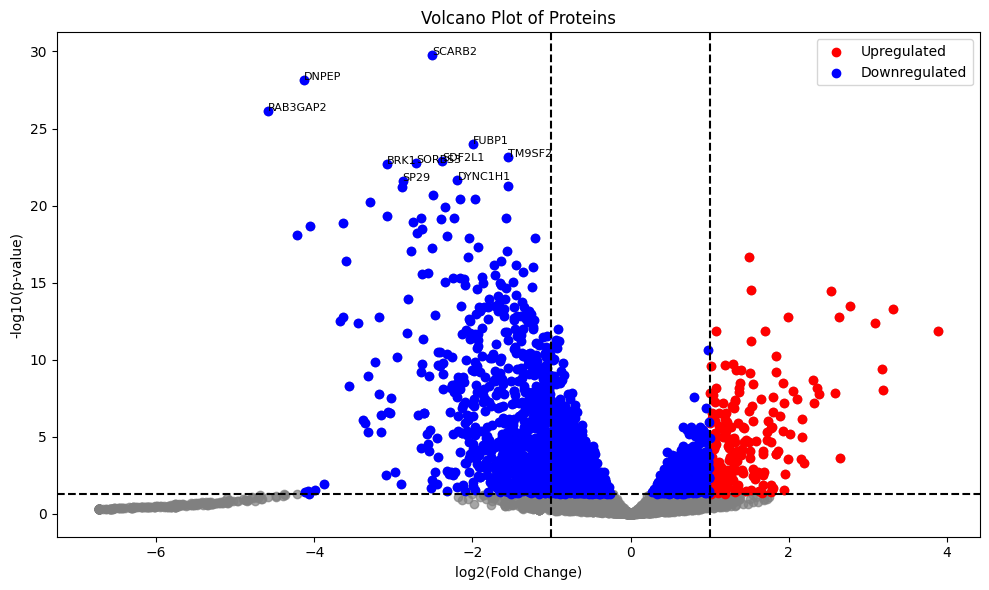

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Calculate -log10(p-value)
com['neg_log10_pval'] = -np.log10(com['screwed'])

# Plot base volcano
plt.figure(figsize=(10, 6))
plt.scatter(com['logfoldchange'], com['neg_log10_pval'], color='grey', alpha=0.7)


fc_thresh = 1
pval_thresh = 0.05

up = com[(com['logfoldchange'] > fc_thresh) & (com['screwed'] < pval_thresh)]
down = com[(com['logfoldchange'] < fc_thresh) & (com['screwed'] < pval_thresh)]

plt.scatter(up['logfoldchange'], up['neg_log10_pval'], color='red', label='Upregulated')
plt.scatter(down['logfoldchange'], down['neg_log10_pval'], color='blue', label='Downregulated')

# Add threshold lines
plt.axhline(-np.log10(pval_thresh), color='black', linestyle='--')
plt.axvline(fc_thresh, color='black', linestyle='--')
plt.axvline(-fc_thresh, color='black', linestyle='--')

#  Label top N significant proteins
top_proteins = com.nsmallest(10,'screwed')
for _, row in top_proteins.iterrows():
    plt.text(row['logfoldchange'], row['neg_log10_pval'], row['protein_list'], fontsize=8)

plt.xlabel('log2(Fold Change)')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot of Proteins')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
kbc = (fb[fb['high:cmeans']!=0])
kbc2 = (kbc[kbc['low:cmeans']!=0])

In [ ]:
fb = kbc2

In [ ]:
fb


,high:cmeans,low:cmeans,protein_list,low:cstd,high:cstd,diff_means,p-values,degreesoffreedm,d,h,logfoldchange,neg_log10_pval,screwed,valus,pup
1,0.102095,0.048483,IGLV8-61,0.220933,0.153413,0.053612,1.734683,150,-3.292010,-4.366378,1.074368,0.873647,0.133768,0.133768,0.133768
2,0.092614,0.051636,IGLV7-46,0.193357,0.167562,0.040978,1.335830,150,-3.432626,-4.275469,0.842843,0.675941,0.210892,0.210892,0.210892
3,0.015092,0.030696,IGLV2-18,0.112572,0.158233,-0.015604,-0.615706,150,-6.050054,-5.025783,-1.024271,0.310317,0.489421,0.489421,0.489421
4,0.142071,0.124520,IGLV3-10,0.200724,0.199358,0.017550,0.504185,150,-2.815316,-3.005545,0.190229,0.208775,0.618336,0.618336,0.618336
5,0.086564,0.104705,IGLV3-9,0.133507,0.178738,-0.018141,-0.627674,150,-3.530093,-3.255600,-0.274493,0.311162,0.488470,0.48847,0.488470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6506,0.232327,0.307811,FAM169A,0.158397,0.226646,-0.075485,-2.086262,150,-2.105774,-1.699881,-0.405892,1.711268,0.019442,0.019442,0.019442
6507,0.177463,0.097351,ENPP4,0.232628,0.171838,0.080111,2.382584,150,-2.494411,-3.360654,0.866243,1.442839,0.036071,0.036071,0.036071
6508,0.042867,0.034702,ZHX2,0.131523,0.170775,0.008165,0.293796,150,-4.543998,-4.848842,0.304844,0.125946,0.748262,0.748262,0.748262
6510,0.067490,0.044075,IVNS1ABP,0.201025,0.180017,0.023416,0.719216,150,-3.889173,-4.503912,0.614739,0.305835,0.494499,0.494499,0.494499


In [ ]:
gy

,anirudh,1175T,1185T,1191T,1215T,1217T,1219T,1225T,1226T,1229T,...,2226T,2230T,2234T,2255T,2313T,2353T,2362T,2436T,2451T,2458T
0,IGLV4-69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IGLV8-61,156507.5781,109651.4297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,80403.26563,NaN,146454.9844,NaN,NaN
2,IGLV7-46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174569.7969,14162.5752,...,NaN,130360.91410,NaN,NaN,NaN,146215.62500,134264.29690,NaN,NaN,NaN
3,IGLV2-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IGLV3-10,NaN,NaN,48222.25781,50968.54688,47204.50781,15415.00195,180558.6875,51878.3125,435142.8438,...,49016.12109,30359.32227,NaN,21424.07617,35675.64844,150685.60940,43043.48828,157502.0313,33287.27344,28448.42578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,ENPP4,NaN,NaN,NaN,NaN,5975.79600,5563.59600,NaN,8875.4510,2701.5540,...,2864.77700,7285.81900,5016.357,NaN,6850.01600,NaN,5027.21000,NaN,3717.35000,2528.78500
6508,ZHX2,44585.3900,NaN,NaN,NaN,NaN,NaN,NaN,37102.0300,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6509,MORC2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2042.05000,NaN,NaN,NaN,NaN,NaN,NaN,4499.7940,NaN,NaN
6510,IVNS1ABP,NaN,NaN,NaN,NaN,30581.10000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36576.97000,NaN


In [ ]:
tx.sum()

,0
anirudh,
IGLV4-69,0.000000
IGLV8-61,2.278700
IGLV7-46,2.426908
IGLV2-18,1.442734
IGLV3-10,5.852462
...,...
ENPP4,4.575518
ZHX2,1.630988
MORC2,0.000000


In [ ]:
from scipy import stats
au = fb["screwed"]


In [ ]:
from statsmodels.stats.multitest import multipletests
correct  = multipletests(au,alpha =0.05,method = 'fdr_bh')

In [ ]:
reject, corrected, _, _ = correct

In [ ]:
len(corrected)
len(corrected)


6255

In [ ]:
fb['corrected'] = corrected

/tmp/ipython-input-1785676467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb['corrected'] = corrected


/tmp/ipython-input-2999901628.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb['neg_log10_pval'] = -np.log10(fb['pup'])


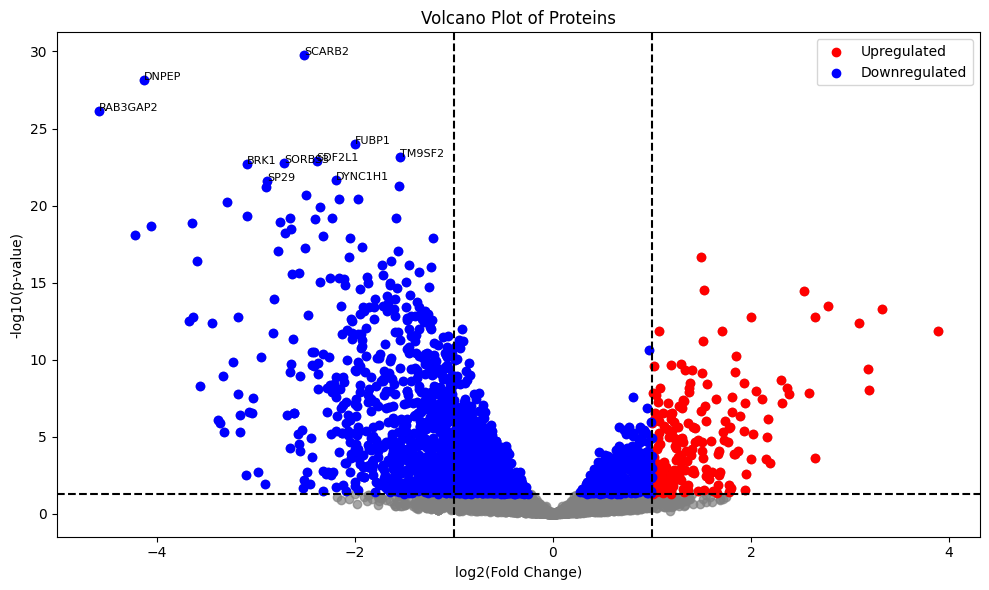

In [ ]:
#Now let us plot the volcano plot
fb
import matplotlib.pyplot as plt
import numpy as np

# Calculate -log10(p-value)
fb['neg_log10_pval'] = -np.log10(fb['pup'])

# Plot base volcano
plt.figure(figsize=(10, 6))
plt.scatter(fb['logfoldchange'], fb['neg_log10_pval'], color='grey', alpha=0.7)


fc_thresh = 1
pval_thresh = 0.05

up = fb[(fb['logfoldchange'] > fc_thresh) & (fb['screwed'] < pval_thresh)]
down = fb[(fb['logfoldchange'] < fc_thresh) & (fb['screwed'] < pval_thresh)]

plt.scatter(up['logfoldchange'], up['neg_log10_pval'], color='red', label='Upregulated')
plt.scatter(down['logfoldchange'], down['neg_log10_pval'], color='blue', label='Downregulated')

# Add threshold lines
plt.axhline(-np.log10(pval_thresh), color='black', linestyle='--')
plt.axvline(fc_thresh, color='black', linestyle='--')
plt.axvline(-fc_thresh, color='black', linestyle='--')

#  Label top N significant proteins
top_proteins = fb.nsmallest(10,'screwed')
for _, row in top_proteins.iterrows():
    plt.text(row['logfoldchange'], row['neg_log10_pval'], row['protein_list'], fontsize=8)

plt.xlabel('log2(Fold Change)')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot of Proteins')
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-4160369957.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb['neg_log10_pval'] = -np.log10(fb['corrected'])


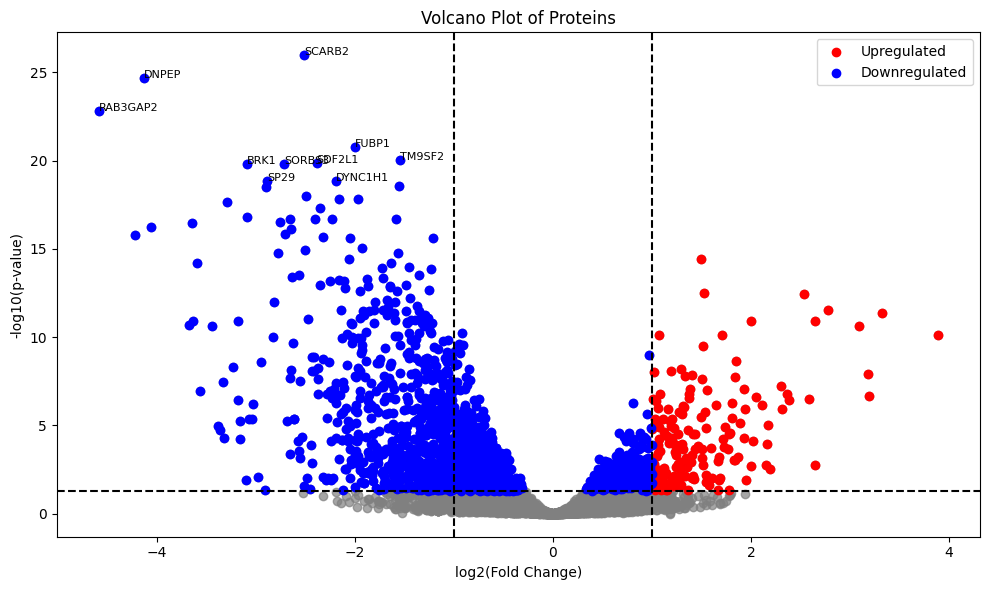

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate -log10(p-value)
fb['neg_log10_pval'] = -np.log10(fb['corrected'])

# Plot base volcano
plt.figure(figsize=(10, 6))
plt.scatter(fb['logfoldchange'], fb['neg_log10_pval'], color='grey', alpha=0.7)


fc_thresh = 1
pval_thresh = 0.05

up = fb[(fb['logfoldchange'] > fc_thresh) & (fb['corrected'] < pval_thresh)]
down = fb[(fb['logfoldchange'] < fc_thresh) & (fb['corrected'] < pval_thresh)]

plt.scatter(up['logfoldchange'], up['neg_log10_pval'], color='red', label='Upregulated')
plt.scatter(down['logfoldchange'], down['neg_log10_pval'], color='blue', label='Downregulated')

# Add threshold lines
plt.axhline(-np.log10(pval_thresh), color='black', linestyle='--')
plt.axvline(fc_thresh, color='black', linestyle='--')
plt.axvline(-fc_thresh, color='black', linestyle='--')

#  Label top N significant proteins
top_proteins = fb.nsmallest(10,'screwed')
for _, row in top_proteins.iterrows():
    plt.text(row['logfoldchange'], row['neg_log10_pval'], row['protein_list'], fontsize=8)

plt.xlabel('log2(Fold Change)')
plt.ylabel('-log10(p-value)')
plt.savefig('my_protein_volcano_plot.jpg',format = 'jpg', dpi = 300)
plt.title('Volcano Plot of Proteins')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# volcano plot has been generrated with use of the corrected p values and the corrected p values for each type of protein ahs bee kept in corrected column of the fb dataframe

In [ ]:
kbc = kbc[kbc['screwed']<0.05]
#What Protein are significantly diffeerent in both the cirrhossis groups
hcc = kbc.sort_values(by = 'screwed', ascending = True)[['Protein_name','screwed']]
#Proteins that are most significantly different in both the cirrhosis groups (ranked in descending order, most different first)
hcc
#Proteins that are more significant in lower cirrhosis group as compard to higher cirrhosos groups, arranged by lowest log fold change to highest
lcc1 = kbc.sort_values(by = 'logfoldchange', ascending = True)[['Protein_name', 'logfoldchange']]
lcc1
#Proteins that are more significantly higher in higher cirrhosis group as compared to lower cirrhossis groups, arranged by highest log fold change to lowest in descending order
hcc2 = kbc.sort_values(by = 'logfoldchange', ascending = False)[['Protein_name', 'logfoldchange']]
hcc2.to_excel('proteins_significant_.xlsx', index = False)
low_excelsheet_with_logfoldchange = lcc1.to_excel('lowcirrhosis.xlsx', index = False)
different_proteins_in_both_grops = hcc.to_excel('highcirrhosis.xlsx', index = False)

In [ ]:
kbc['Protein_name'] = kbc['protein_list']

In [ ]:
#The list of the proteins that are significantly different in both the protein groups
dd = dd.sort_values(by = 'screwed',ascending = True)

In [ ]:
dd['p-value']= dd['screwed']
dd.drop('screwed',axis = 1, inplace = True) #Proteins that have significant difference among both cirrhossis groups in high to low order(400 of them)'


PROTEINS (TOP 400) THAT ARE MOST DIFFERENT BETWEEN TWO GROUPS ON THE BASIS FOR P VALUE IN DESCENDING ORDER STORED IN A DATAFRAME

In [ ]:
dd

PROTEINS THAT ARE HIGHER IN HIGH CIRHOSSIS GROUP AS COMPARED TO LOW CIRHOSSIS GROUP ARE STORED IN DATAFRAME MENTIONING THE LOG FOLDED CHANGE DESCENDING ORDER

In [ ]:
fb

In [ ]:
high_cirhosssis = hc[['protein_list', 'logfoldchange']]

In [ ]:
high_cirhosssis[:250].to_excel() #Proteins higher in higher cirrhossis grou (top 30) along with the log change value


In [ ]:
low_cirhossis = kbc.sort_values(by = 'logfoldchange', ascending=True)
low_cirhossis = low_cirhossis[['protein_list','logfoldchange']]


In [ ]:
low_cirhossis[:250].to_excel() #Those that more signifcan in lower cirrhossis than higher cirrhosis along with ou log fold change valu based

In [ ]:
hc = kbc.sort_values(by = 'logfoldchange',ascending = False)